<a href="https://colab.research.google.com/github/ylmgrbzz/Deep-Learning-Projects-With-Keras-TensorFlow-PyTorch/blob/main/Object_Recognition_With_ResNet50_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [6]:
import os 
os.chdir('/gdrive/My Drive/ylm/')

In [7]:
!ls

calısma  model_fashion-mnist_cnn_train1_epoch12.h5
images	 model_fashion-mnist_cnn_train2_epoch24.h5


In [8]:
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

In [9]:
model = VGG16(weights = 'imagenet', include_top=True)


553467096/553467096 [==============================] - 8s 0us/step


In [10]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'input_1': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 

In [11]:
model.count_params()


138357544

In [13]:
import os 
os.chdir('/gdrive/My Drive/ylm/images/')

In [18]:
!ls


1662809752940.jfif  f16.jpg   olips3.jpeg  README.md
betty.jpg	    inek.jpg  olips.jpeg   van-kedisi.jpg


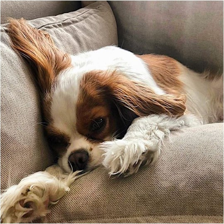

In [15]:
image_path = 'betty.jpg'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [16]:
x = np.array(image, dtype = 'float32') 
x = np.expand_dims(x, axis=0) 
x= preprocess_input(x)

In [17]:
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

35363/35363 [==============================] - 0s 0us/step
predicted: [('n02086646', 'Blenheim_spaniel', 0.99342394), ('n02085782', 'Japanese_spaniel', 0.0056090034), ('n02086910', 'papillon', 0.00027528947)]
Blenheim_spaniel


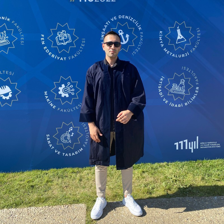

In [20]:
image_path = '1662809752940.jfif'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [21]:
x = np.array(image, dtype = 'float32') 
x = np.expand_dims(x, axis=0) 
x= preprocess_input(x)

In [22]:
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

1/1 [==============================] - 0s 22ms/step
predicted: [('n03787032', 'mortarboard', 0.15256417), ('n04456115', 'torch', 0.11591835), ('n04507155', 'umbrella', 0.06679779)]
mortarboard


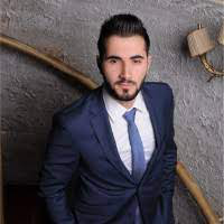

In [23]:
image_path = 'indir.jfif'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [24]:
x = np.array(image, dtype = 'float32') 
x = np.expand_dims(x, axis=0) 
x= preprocess_input(x)

In [25]:
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

1/1 [==============================] - 0s 42ms/step
predicted: [('n03873416', 'paddle', 0.058296714), ('n02906734', 'broom', 0.055022262), ('n03447721', 'gong', 0.038935702)]
paddle


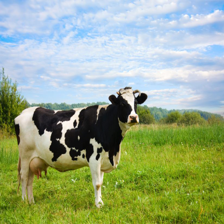

In [28]:
image_path = 'inek.jpg'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [29]:
x = np.array(image, dtype = 'float32') 
x = np.expand_dims(x, axis=0) 
x= preprocess_input(x)

In [31]:
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0])
print(decode_predictions(preds, top=1)[0][0][1])

1/1 [==============================] - 0s 17ms/step
predicted: [('n02403003', 'ox', 0.61161405), ('n02412080', 'ram', 0.1049149), ('n02106166', 'Border_collie', 0.055150673)]
ox


In [39]:
from keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator , array_to_img, load_img, img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

In [34]:
model = ResNet50(weights="imagenet")


102967424/102967424 [==============================] - 2s 0us/step


In [41]:
def prepare_image(image, target):
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	return image

In [36]:
ImageURL = "https://imgix.bustle.com/uploads/image/2018/4/9/471897e4-4a04-4373-9112-53c381928d89-shutterstock_1064524748.jpg?w=970&h=582&fit=crop&crop=faces&auto=format&q=70\"" #@param {type:"string"}


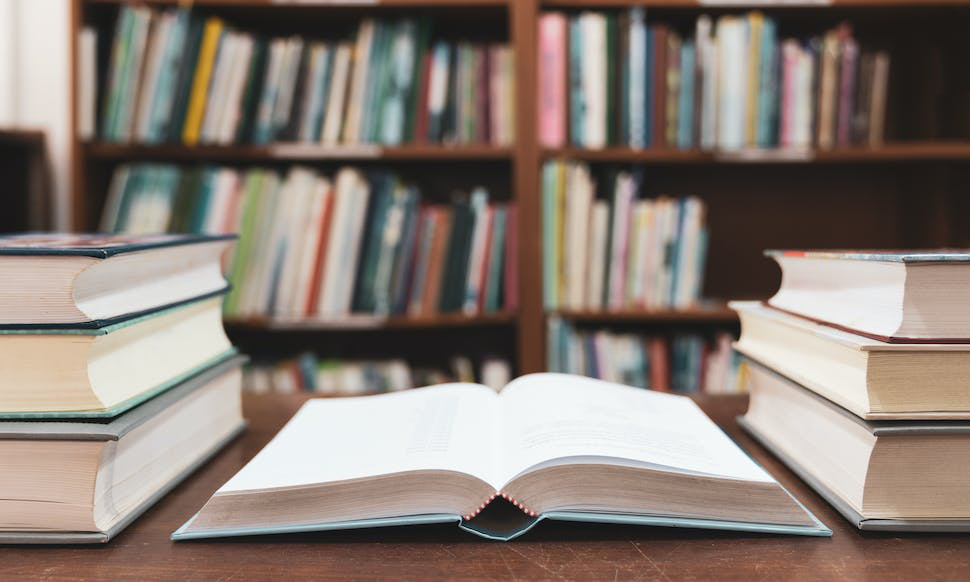

In [37]:
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

In [42]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) 

preds = model.predict(pre_image)

results = imagenet_utils.decode_predictions(preds) 
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: 
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True


1/1 [==============================] - 0s 23ms/step


In [43]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 


Sınıflandırma tahmini en yüksek olan 0.8283472657203674 oranıyla library'dır.
